In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('da_salary_cleaned.csv')
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,...,Company_text,State,Age,Python,Tableau,Excel,Power BI,SAS,SQL,SSIS
0,1,Entry Level Data Conversion Analyst,$35K - $71K (Glassdoor est.),"As the Data Conversion Analyst, you will be co...",3.4,Reynolds and Reynolds\r\n3.4,"Dayton, OH",1001 to 5000 Employees,1866,Company - Private,...,Reynolds and Reynolds,OH,156,0,0,0,0,0,0,0
1,3,Senior Data Analyst with Visualization (No spo...,$63K - $149K (Glassdoor est.),Senior Data Analyst with Visualization (No spo...,3.7,HCL Technologies\r\n3.7,"Burlingame, CA",10000+ Employees,1991,Company - Public,...,HCL Technologies,CA,31,0,0,0,0,0,0,0
2,4,Data Analyst,$43K - $88K (Glassdoor est.),Dematic is looking for a Data Analyst that wil...,3.8,Dematic\r\n3.8,"Atlanta, GA",5001 to 10000 Employees,1819,Subsidiary or Business Segment,...,Dematic,GA,203,0,0,0,0,0,0,0
3,5,Data Analyst,Employer Provided Salary:$45 - $65 Per Hour,We are looking for a passionate certified Data...,4.2,WorkCog\r\n4.2,"Atlanta, GA",51 to 200 Employees,2017,Company - Private,...,WorkCog,GA,5,0,0,0,0,0,0,0
4,7,North America Data Analyst,$56K - $100K (Glassdoor est.),"This role is responsible for collecting, inter...",4.0,The Coca-Cola Company\r\n4.0,"Atlanta, GA",10000+ Employees,1886,Company - Public,...,The Coca-Cola Company,GA,136,0,0,1,1,0,0,0


In [3]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Hourly', 'Employer provided',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Company_text', 'State',
       'Age', 'Python', 'Tableau', 'Excel', 'Power BI', 'SAS', 'SQL', 'SSIS'],
      dtype='object')

In [4]:
def title_simplifier(title):
    if 'data analyst' in title.lower():
        return 'data analyst'
    elif 'business analyst' in title.lower():
        return 'business analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'analytics' in title.lower():
        return 'analytics'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'principal' in title.lower() or 'lead' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [5]:
df['Job Simplified'] = df['Job Title'].apply(title_simplifier)
df['Seniority'] = df['Job Title'].apply(seniority)

In [6]:
df['Job Simplified'].value_counts()


data analyst        353
na                  112
analytics            38
business analyst     24
Name: Job Simplified, dtype: int64

In [7]:
df['Seniority'].value_counts()

na        450
senior     74
jr          3
Name: Seniority, dtype: int64

In [8]:
# Fix the California and Alabama in the state feature
df['State'] = df['State'].apply(lambda x: x.replace('California','CA').replace('Alabama','AL'))
df['State'] = df['State'].apply(lambda x: x.strip() if x.strip().lower()!= 'los angeles' else 'CA')

In [9]:
# Job description length
df['Desc_length'] = df['Job Description'].apply(lambda x: len(x))
df['Desc_length']

0       849
1       910
2       667
3       783
4      1105
       ... 
522    1105
523     849
524     667
525     872
526    1101
Name: Desc_length, Length: 527, dtype: int64

In [10]:
# Hourly Wage to annual 
df['Min Salary'] = df.apply(lambda x: x['Min Salary']*2 if x.Hourly==1 else x['Min Salary'],axis=1)
df['Max Salary'] = df.apply(lambda x: x['Max Salary']*2 if x.Hourly==1 else x['Max Salary'],axis=1)

In [11]:
df[df['Hourly']==1][['Hourly','Min Salary','Max Salary']]

,Hourly,Min Salary,Max Salary
3,1,90,130


 --------------------------------------------------------EDA------------------------------------------------------------------- 

In [12]:
df.describe()

,index,Rating,Founded,Hourly,Employer provided,Min Salary,Max Salary,Avg Salary,Age,Python,Tableau,Excel,Power BI,SAS,SQL,SSIS,Desc_length
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,505.497154,3.972106,1961.368121,0.001898,0.003795,53.787476,94.313093,73.945920,60.631879,0.022770,0.047438,0.072106,0.058824,0.017078,0.087287,0.104364,848.225806
std,287.384686,0.382656,58.963619,0.043561,0.061546,8.090293,10.617202,7.823651,58.963619,0.149312,0.212777,0.258910,0.235518,0.129684,0.282523,0.306023,303.926385
min,1.000000,2.800000,1794.000000,0.000000,0.000000,26.000000,59.000000,42.500000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,128.000000
25%,244.500000,3.800000,1909.000000,0.000000,0.000000,50.000000,89.000000,69.500000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,667.000000
50%,510.000000,4.000000,1993.000000,0.000000,0.000000,56.000000,100.000000,78.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,905.000000
75%,757.500000,4.200000,2009.000000,0.000000,0.000000,56.000000,100.000000,78.000000,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1073.000000
max,999.000000,5.000000,2017.000000,1.000000,1.000000,90.000000,149.000000,106.000000,228.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2033.000000


In [13]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Hourly', 'Employer provided',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Company_text', 'State',
       'Age', 'Python', 'Tableau', 'Excel', 'Power BI', 'SAS', 'SQL', 'SSIS',
       'Job Simplified', 'Seniority', 'Desc_length'],
      dtype='object')

<AxesSubplot:>

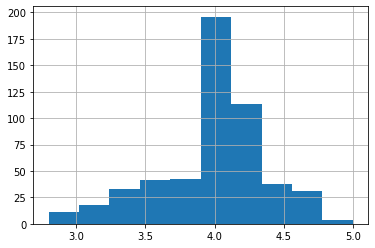

In [14]:
df['Rating'].hist()

<AxesSubplot:>

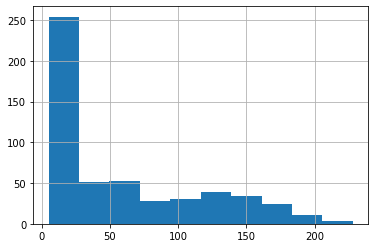

In [15]:
df['Age'].hist()

<AxesSubplot:>

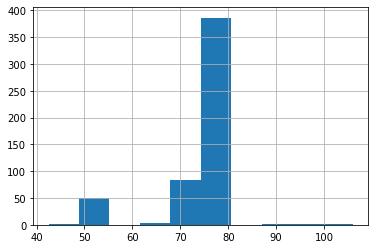

In [16]:
df['Avg Salary'].hist()

<AxesSubplot:>

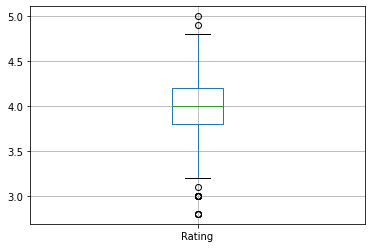

In [23]:
#sns.pairplot(df)

df.boxplot(column='Rating')

In [24]:
df[['Age','Avg Salary','Rating','Desc_length']].corr()

,Age,Avg Salary,Rating,Desc_length
Age,1.000000,-0.003905,-0.361813,0.034793
Avg Salary,-0.003905,1.000000,-0.090965,-0.038036
Rating,-0.361813,-0.090965,1.000000,0.203252
Desc_length,0.034793,-0.038036,0.203252,1.000000


<AxesSubplot:>

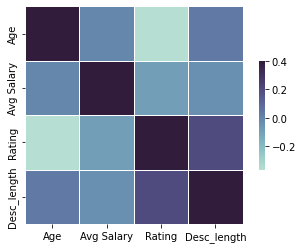

In [29]:
#cmap = sns.color_palette("summer", as_cmap=True)
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

sns.heatmap(df[['Age','Avg Salary','Rating','Desc_length']].corr(),vmax=.4,center=0,cmap=cmap,
           square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [31]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Hourly', 'Employer provided',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Company_text', 'State',
       'Age', 'Python', 'Tableau', 'Excel', 'Power BI', 'SAS', 'SQL', 'SSIS',
       'Job Simplified', 'Seniority', 'Desc_length'],
      dtype='object')

In [32]:
df_categ = df[['Location', 'Size','Type of ownership','Industry', 'Sector', 'Revenue','Company_text', 'State','Python', 
               'Tableau', 'Excel', 'Power BI', 'SAS', 'SQL', 'SSIS','Job Simplified', 'Seniority']]

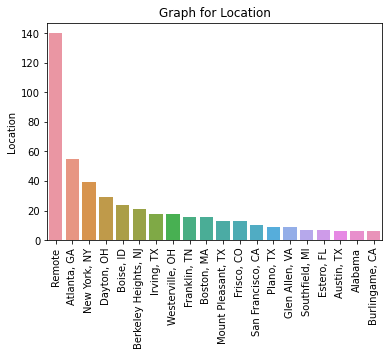

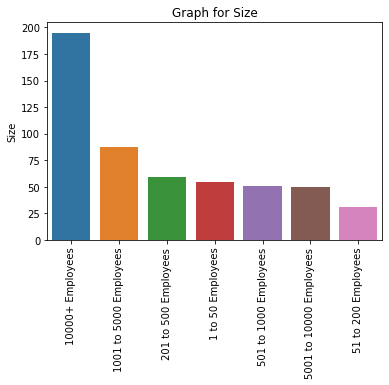

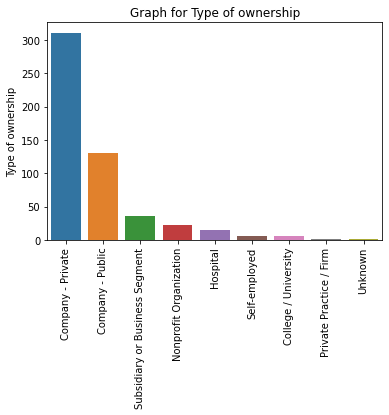

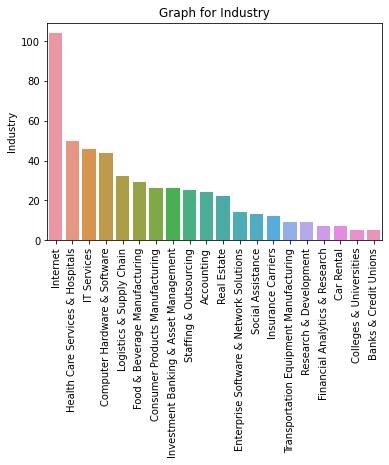

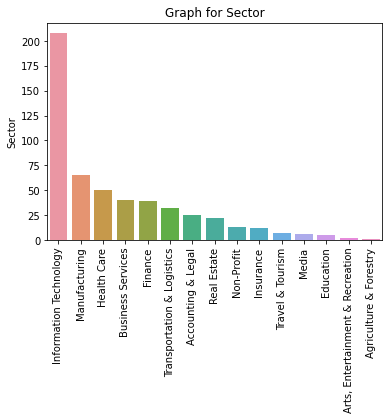

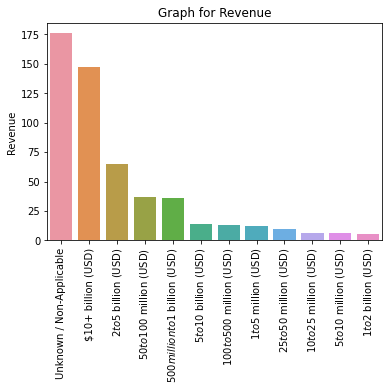

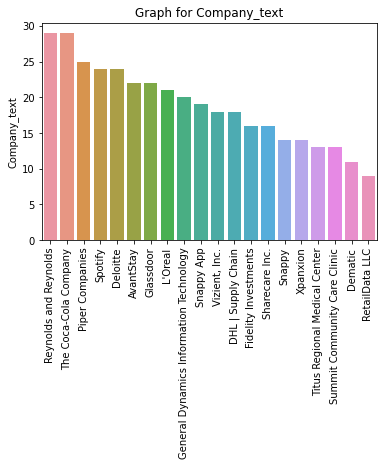

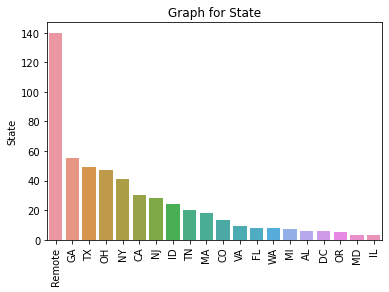

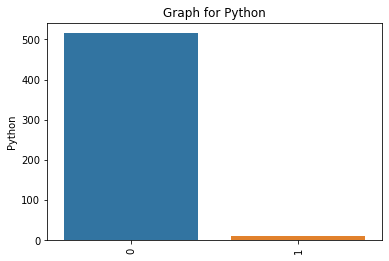

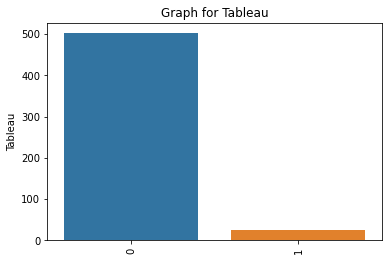

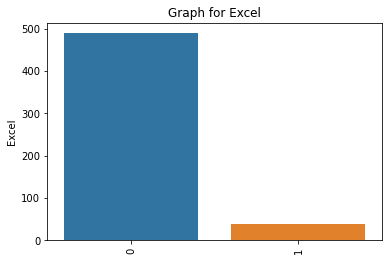

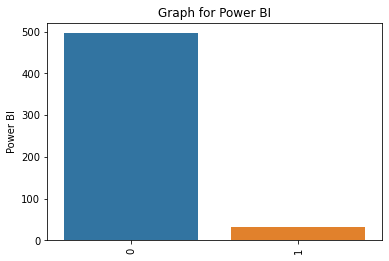

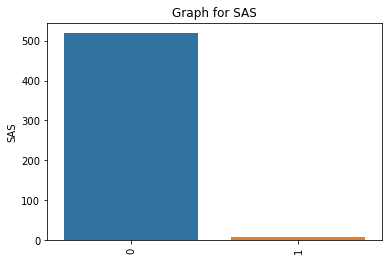

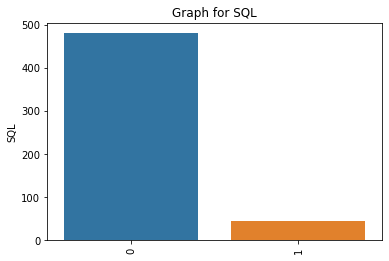

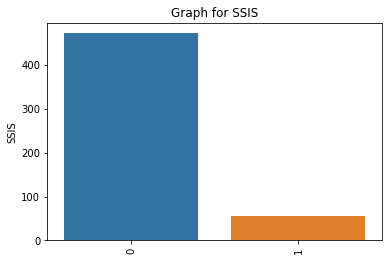

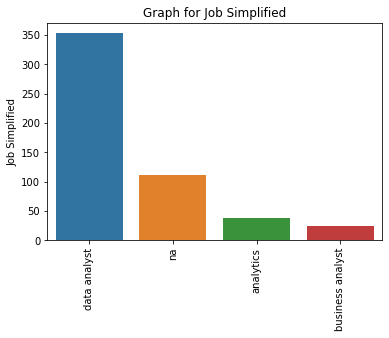

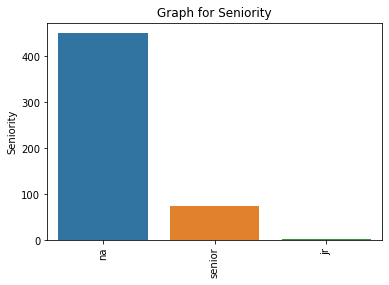

In [49]:
# Can add this palette for the barplots :
# cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=False)
# palette=cmap

for feature in df_categ.columns:
    categ_num = df[feature].value_counts()[:20]           #Get the 20 highest values from each feature
    #print("Graph for %s, Total : %d" %(feature,len(categ_num)))
    chart = sns.barplot(x = categ_num.index, y =categ_num)    #Plot the 20 highest values from each feature
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90) #Rotate the x index to 90 degres 
    plt.title('Graph for %s'%feature)
    plt.show()
    

In [51]:
pd.pivot_table(df, index=['Job Simplified','Seniority'], values='Avg Salary')

Avg Salary
Job Simplified   Seniority            
analytics        na          74.568966
                 senior      72.444444
business analyst na          72.958333
data analyst     jr          69.500000
                 na          74.482201
                 senior      74.109756
na               na          72.721591
                 senior      72.604167

In [56]:
pd.pivot_table(df, index=['State','Job Simplified'], values='Avg Salary').sort_values('State',ascending=False)

Avg Salary
State  Job Simplified              
WA     data analyst       81.375000
VA     data analyst       71.500000
TX     na                 72.833333
       data analyst       76.067568
       analytics          72.444444
TN     data analyst       71.625000
SC     data analyst       69.500000
Remote data analyst       73.792683
       analytics          73.477273
       na                 73.402778
PA     na                 69.500000
       data analyst       69.500000
OR     data analyst       76.300000
OH     na                 73.655172
       data analyst       74.472222
NY     business analyst   72.958333
       data analyst       73.529412
NM     data analyst       69.500000
NJ     data analyst       72.767857
NC     na                 42.500000
MO     data analyst       79.500000
MI     analytics          78.000000
MD     data analyst       69.500000
MA     na                 70.812500
       data analyst       73.750000
KS     na                 78.000000
IL     na                 79.500000
       data analyst       74.500000
ID     na                 72.604167
GA     data analyst       75.109091
FL     data analyst       78.375000
DC     data analyst       78.000000
CO     data analyst       73.807692
CA     data analyst       73.783333
AL     data analyst       78.000000

In [61]:
pd.pivot_table(df[df['Job Simplified'] == 'data analyst'], index='State', values='Avg Salary').sort_values('Avg Salary',ascending=False)

,Avg Salary
State,
WA,81.375000
MO,79.500000
FL,78.375000
AL,78.000000
DC,78.000000
OR,76.300000
TX,76.067568
GA,75.109091
IL,74.500000
